# Define the Question 
## Specify the Question

The data is for company X which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee.

Satisfaction Level
Last evaluation

Number of projects

Average monthly hours

Time spent at the company

Whether they have had a work accident

Whether they have had a promotion in the last 5 years

Departments (column sales)

Salary

Whether the employee has left


## Metric of Success

Discover what time of employees are leaving 

Determine accurately the employees likely to leave

## Experimental Design
Loading libraries and data

Data Understanding 

Data Preparation

In [148]:
#import libraries
import pandas as pd
import numpy as np

#visualization
import seaborn as sns 
from matplotlib import pyplot as plt 

In [149]:
#load the file with the datasets 
df = pd.ExcelFile("Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx")
df

In [150]:
sheet_names = df.sheet_names
sheet_names

['INFO', 'Existing employees', 'Employees who have left', 'Presentation']

In [151]:
#load each sheet as a dataframe 
#sheet1
deliverables = df.parse("INFO")
display(deliverables.head())

#sheet2 
existing_emp = df.parse("Existing employees")
display(existing_emp.head())

#Sheet3
left_emp = df.parse("Employees who have left")
display(left_emp.head())

,"The data is for company X which is trying to control attrition. There are two sets of data: ""Existing employees"" and ""Employees who have left"". Following attributes are available for every employee."
0,Satisfaction Level
1,Last evaluation
2,Number of projects
3,Average monthly hours
4,Time spent at the company


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


# Left Employees 

### Data Understanding

In [152]:
#Total rows and columns
left_emp.shape
#there exists 10 columns ans 3571 rows 

(3571, 10)

In [153]:
#data types 
left_emp.dtypes
#There exists 2 objects,6 integers and 2 floats

Emp ID                     int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

## Data Cleaning

In [154]:
#Consistency
left_emp.duplicated().sum()

0

In [155]:
#Completeness - missing values
left_emp.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [156]:
#Uniformity
#Create uniformity the the column names 
left_emp.columns = left_emp.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
left_emp.head()
#all the white spaces have been eliminated and the column names are all in lowercase

,emp_id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [157]:
left_emp.columns

Index(['emp_id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

## Feature Engineering

In [158]:
# Feature Engineering
def satisfaction(df,variable_1):
  variable2_count = 0
  for ind ,row in df.iterrows():
    if row[variable_1] <= 0.25:
      df.loc[ind,'satisfaction'] = 0.25
    
    elif ((row[variable_1] > 0.25) & (row[variable_1] < 0.75)):
      df.loc[ind,'satisfaction'] = 0.50
    
    elif row[variable_1] >= 0.75:
        df.loc[ind,'satisfaction'] = 0.75
        
    else:
      df.loc[ind,'satisfaction'] = 0

In [159]:
#mplement the function 
satisfaction(left_emp,"satisfaction_level")

In [160]:
#view the dataframe again
left_emp.sample(5)

,emp_id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,dept,salary,satisfaction
3491,14920,0.37,0.54,2,157,3,0,0,support,low,0.50
3394,14823,0.39,0.53,2,127,3,0,0,sales,medium,0.50
1214,1215,0.09,0.87,7,278,4,0,0,IT,low,0.25
3355,14784,0.75,0.97,5,243,6,0,0,technical,medium,0.75
1126,1127,0.88,0.87,4,235,6,0,0,management,low,0.75


## Exploratory Data Analysis

### Univariate Analysis

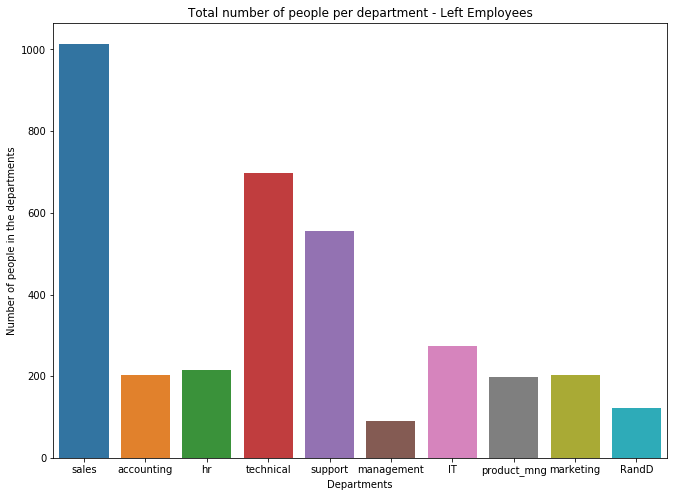

In [161]:
#categorical = ['dept']
plt.figure(figsize=(11,8))
sns.countplot(left_emp.dept)
plt.ylabel("Number of people in the departments")
plt.xlabel("Departments")
plt.title("Total number of people per department - Left Employees")
plt.show()
#sales,support and technical departments have more people

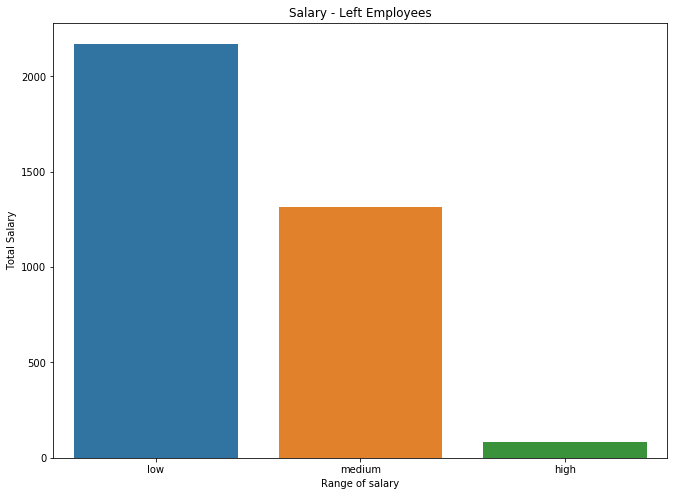

In [162]:
#Salary
plt.figure(figsize=(11,8))
sns.countplot(left_emp.salary)
plt.ylabel("Total Salary")
plt.xlabel("Range of salary")
plt.title("Salary - Left Employees")
plt.show()
#the salary of majority of the employees is either low or medium

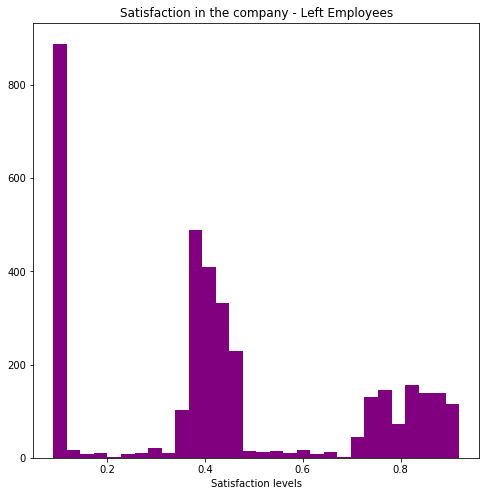

In [163]:
#satisfaction of the employees 
plt.figure(figsize=(8,8))
plt.hist(left_emp["satisfaction_level"],bins = 30,color="purple")
plt.xlabel("Satisfaction levels")
plt.title("Satisfaction in the company - Left Employees")
plt.show()
#majority of the employees that have left were had a satisfaction percentage of <= 25%

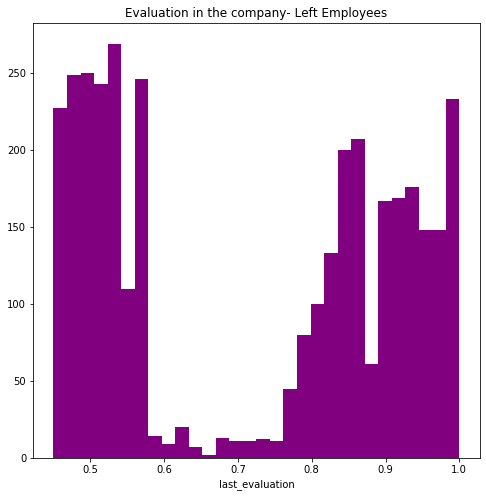

In [164]:
#Evaluation
plt.figure(figsize=(8,8))
plt.hist(left_emp["last_evaluation"],bins = 30,color="purple")
plt.xlabel("last_evaluation")
plt.title("Evaluation in the company- Left Employees")
plt.show()

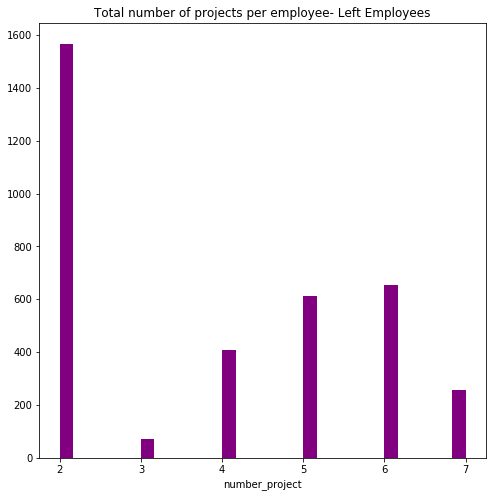

In [165]:
#Number of projects
plt.figure(figsize=(8,8))
plt.hist(left_emp["number_project"],bins = 30,color="purple")
plt.xlabel("number_project")
plt.title("Total number of projects per employee- Left Employees")
plt.show()

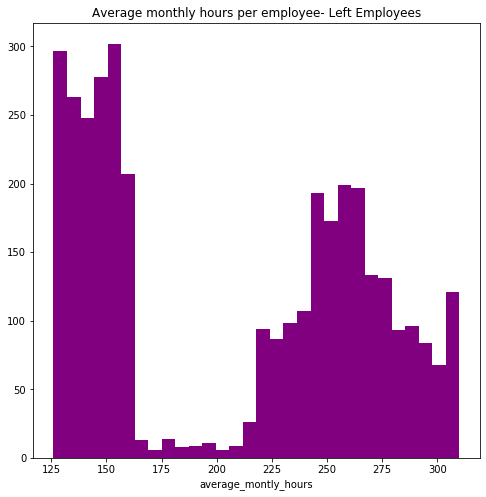

In [166]:
#Average hours
plt.figure(figsize=(8,8))
plt.hist(left_emp["average_montly_hours"],bins = 30,color="purple")
plt.xlabel("average_montly_hours")
plt.title("Average monthly hours per employee- Left Employees")
plt.show()

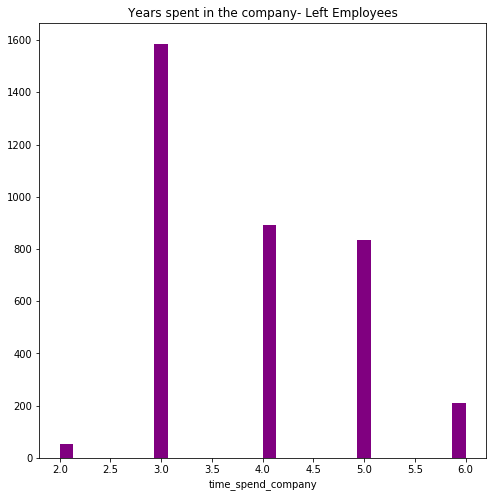

In [167]:
#Duration of time in the company
plt.figure(figsize=(8,8))
plt.hist(left_emp["time_spend_company"],bins = 30,color="purple")
plt.xlabel("time_spend_company")
plt.title("Years spent in the company- Left Employees")
plt.show()

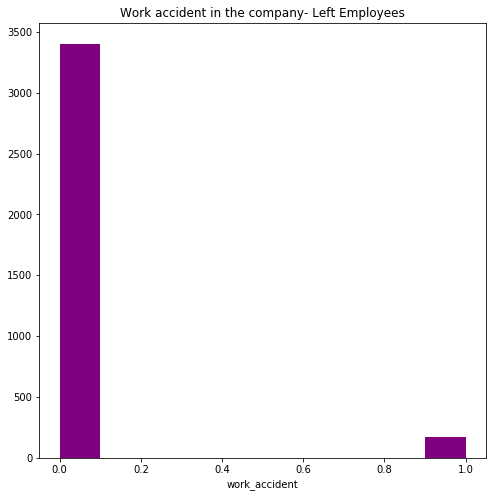

In [168]:
#Work Accident
plt.figure(figsize=(8,8))
plt.hist(left_emp["work_accident"],color="purple")
plt.xlabel("work_accident")
plt.title("Work accident in the company- Left Employees")
plt.show()

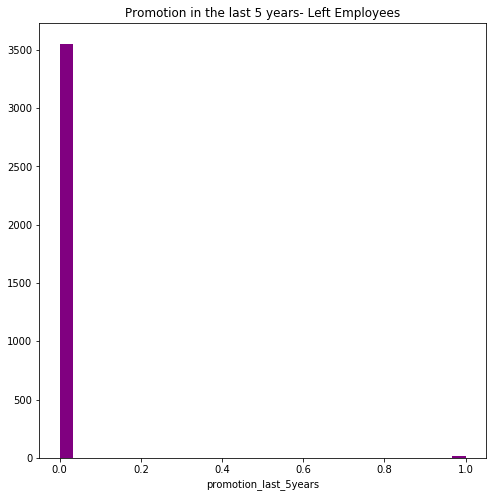

In [169]:
#promotion in the past 5 years
plt.figure(figsize=(8,8))
plt.hist(left_emp["promotion_last_5years"],bins = 30,color="purple")
plt.xlabel("promotion_last_5years")
plt.title("Promotion in the last 5 years- Left Employees")
plt.show()

### Bivariate Analysis

<Figure size 1080x1080 with 0 Axes>

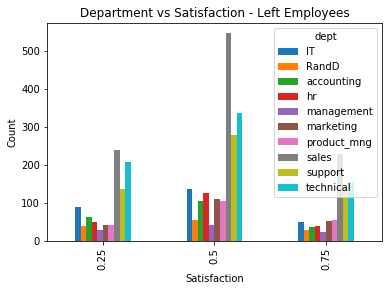

In [170]:
# Department vs Satisfaction
plt.figure(figsize=(15,15))
left_emp.groupby('dept')["satisfaction"].value_counts().unstack(0).plot.bar()
plt.title("Department vs Satisfaction - Left Employees")
plt.xlabel("Satisfaction")
plt.ylabel("Count")
plt.show()
# Majority of the unsatisfied employees are in the sales,technical and support team
#this could be attributed by the high number of employees in these departments

In [171]:
#Which Department has more employees
plt.figure(figsize=(6,6))
left_emp.groupby("dept")["emp_id"].count()

dept
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
Name: emp_id, dtype: int64

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

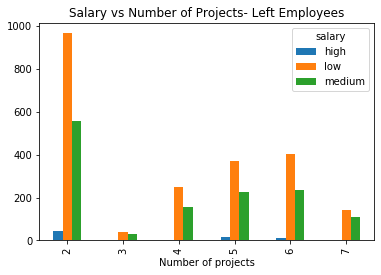

In [172]:
#Relationship between the number of projects and salary
plt.figure(figsize=(6,6))
left_emp.groupby('salary')['number_project'].value_counts().unstack(0).plot.bar()
plt.title("Salary vs Number of Projects- Left Employees")
plt.xlabel("Number of projects")
plt.show()

#From this graph, we can see that majority of the people who leave either have low or medium payments
#They are also overworked with very poor wages
#Majority of the higher earners remain in the business. The few who leave, we can make the assumption that they either opt to retire, have received better opportunities etc


<Figure size 432x432 with 0 Axes>

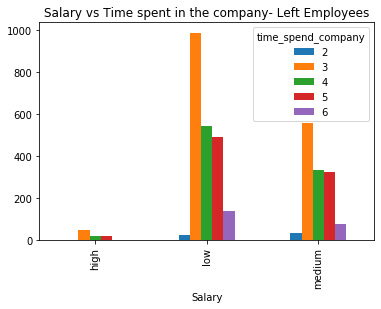

In [173]:
#Employee duration in the company vs the salary they earn
plt.figure(figsize=(6,6))
left_emp.groupby('time_spend_company')['salary'].value_counts().unstack(0).plot.bar()
plt.title("Salary vs Time spent in the company- Left Employees")
plt.xlabel("Salary")
plt.show()
#Majority that have left have been in the company for more than 3 years and still had to bare with poor wages

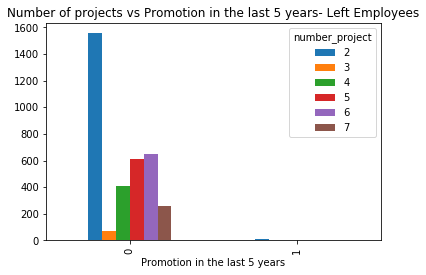

In [174]:
#Number of projects Vs Promotion in the last 5 years 
left_emp.groupby(['number_project'])['promotion_last_5years'].value_counts().unstack(0).plot.bar()
plt.title("Number of projects vs Promotion in the last 5 years- Left Employees")
plt.xlabel("Promotion in the last 5 years")
plt.show()
#Previous employees barely received any promotions

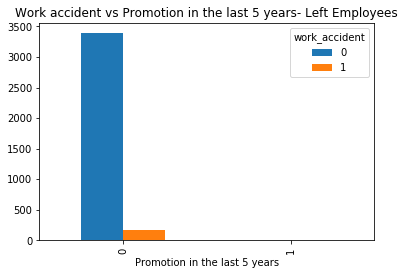

In [175]:
#Could the employees could cause them not to receive promotions
left_emp.groupby(['work_accident'])['promotion_last_5years'].value_counts().unstack(0).plot.bar()
plt.title("Work accident vs Promotion in the last 5 years- Left Employees")
plt.xlabel("Promotion in the last 5 years")
plt.show()

#The company looks like they have lost the best employees 
#This assumption is based on the fact thatthey have never been involved in any accident

### Multivariate Analysis

,emp_id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,satisfaction
emp_id,1.000000,0.000791,-0.016324,-0.013354,-0.009820,-0.001109,-0.024144,0.016686,0.006685
satisfaction_level,0.000791,1.000000,0.182295,-0.227113,-0.084117,0.446440,0.005864,0.005516,0.958180
last_evaluation,-0.016324,0.182295,1.000000,0.804155,0.830336,0.783873,-0.001875,-0.047992,0.043592
number_project,-0.013354,-0.227113,0.804155,1.000000,0.875194,0.601989,-0.008401,-0.032301,-0.347915
average_montly_hours,-0.009820,-0.084117,0.830336,0.875194,1.000000,0.664011,-0.009048,-0.035475,-0.213180
time_spend_company,-0.001109,0.446440,0.783873,0.601989,0.664011,1.000000,0.005222,-0.045888,0.328817
work_accident,-0.024144,0.005864,-0.001875,-0.008401,-0.009048,0.005222,1.000000,0.056214,0.007676
promotion_last_5years,0.016686,0.005516,-0.047992,-0.032301,-0.035475,-0.045888,0.056214,1.000000,0.009282
satisfaction,0.006685,0.958180,0.043592,-0.347915,-0.213180,0.328817,0.007676,0.009282,1.000000


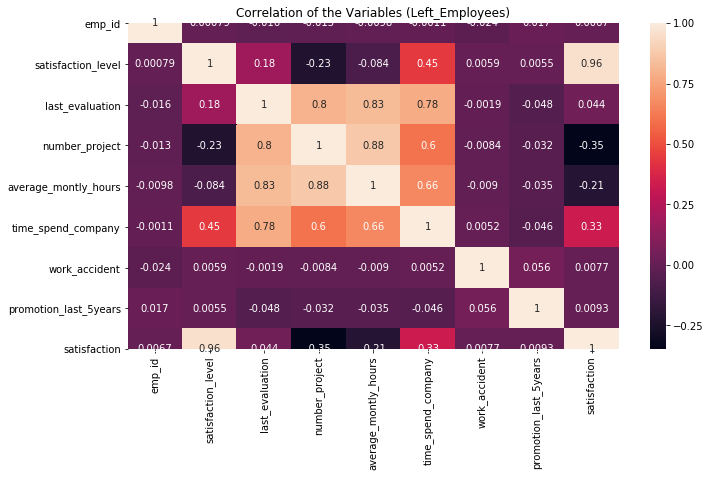

In [176]:
#correlation in the columns
plt.figure(figsize=(11,6))
corr = left_emp.corr()
display(corr)
sns.heatmap(corr,annot = True)
plt.title("Correlation of the Variables (Left_Employees)")
plt.show()
# For the heatmap below, it actually means than if there is a negative relationship between two variable, one varaible increases while the other decreases
#For positive correlation, both variable increase 

# Existing Employees 

## Data Understanding 

In [177]:
#data types 
# total rows and columns 
existing_emp.info()

#there exists float64(2), int64(6), object(2) 
#10 columns and 11428 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11428 entries, 0 to 11427
Data columns (total 10 columns):
Emp ID                   11428 non-null int64
satisfaction_level       11428 non-null float64
last_evaluation          11428 non-null float64
number_project           11428 non-null int64
average_montly_hours     11428 non-null int64
time_spend_company       11428 non-null int64
Work_accident            11428 non-null int64
promotion_last_5years    11428 non-null int64
dept                     11428 non-null object
salary                   11428 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 892.9+ KB


In [178]:
#Check if the id is duplicated
existing_emp["Emp ID"].nunique()

#all the ids are unique 

11428

In [179]:
#summary of the data
existing_emp.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
std,3453.947461,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
min,2001.000000,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,4857.750000,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000
50%,7714.500000,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000
75%,10571.250000,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000
max,14211.000000,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000


##  Data Cleaning 

In [180]:
# Validity
#Check presence of outliers in the dataset 
# create a dataframe with numerical values 
df_num = existing_emp.select_dtypes(["float64", "int64"])
#print 
df_num.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,2001,0.58,0.74,4,215,3,0,0
1,2002,0.82,0.67,2,202,3,0,0
2,2003,0.45,0.69,5,193,3,0,0
3,2004,0.78,0.82,5,247,3,0,0
4,2005,0.49,0.60,3,214,2,0,0


In [181]:
#Consistency
existing_emp.duplicated().sum()

0

In [182]:
#Completeness
existing_emp.isnull().sum()
# all the columns are complete

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [183]:
#Uniformity
existing_emp.columns = existing_emp.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
existing_emp.head()

#all  the column heads have all being put in lowercase and where there was anyy spaces, its being replaced 

,emp_id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


##  Exploratory Data Analysis

### Univariate Analysis


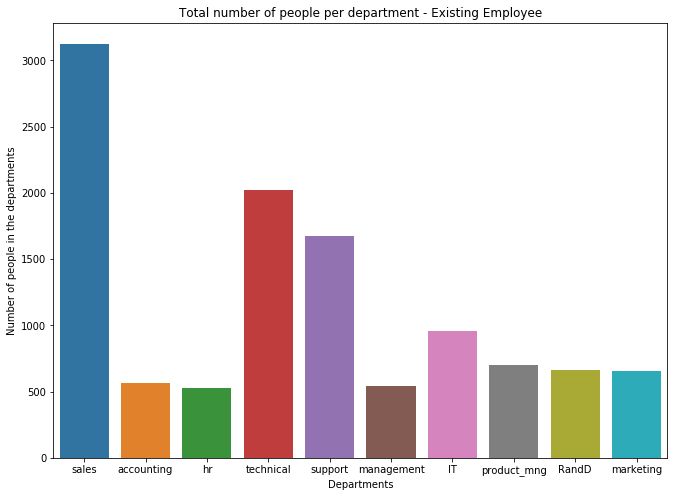

In [184]:
#categorical = ['dept']
plt.figure(figsize=(11,8))
sns.countplot(existing_emp.dept)
plt.ylabel("Number of people in the departments")
plt.xlabel("Departments")
plt.title("Total number of people per department - Existing Employee")
plt.show()

Majority of the employeed are in the sales department followed by the technical department.

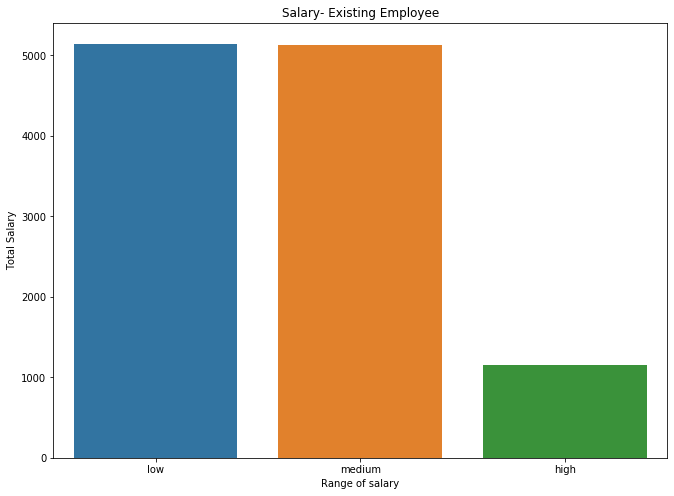

In [185]:
#Salary
plt.figure(figsize=(11,8))
sns.countplot(existing_emp.salary)
plt.ylabel("Total Salary")
plt.xlabel("Range of salary")
plt.title("Salary- Existing Employee")
plt.show()
#the salary of majority of the employees is either low or medium

From the diagram above, we can make the assumption that most of the people whose salary is high have top positions in the company hence the small number.

The number of people earning low salary ==  number of people earning medium salary

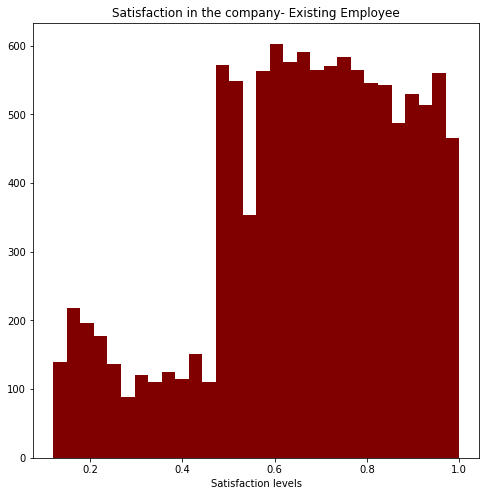

In [186]:
#satisfaction of the employees 
plt.figure(figsize=(8,8))
plt.hist(existing_emp["satisfaction_level"],bins = 30,color="maroon")
plt.xlabel("Satisfaction levels")
plt.title("Satisfaction in the company- Existing Employee")
plt.show()

Majority of the current employees have a satifaction level of greater than 50%

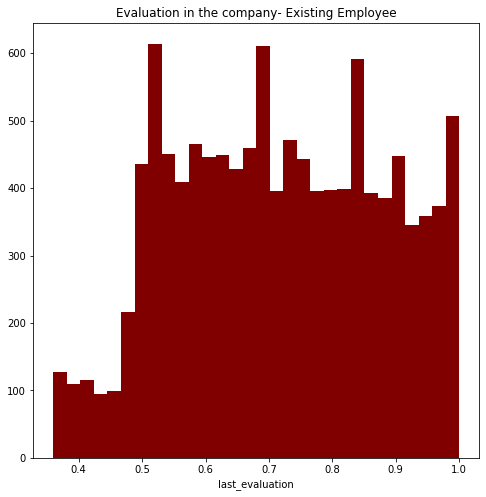

In [187]:
#Evaluation
plt.figure(figsize=(8,8))
plt.hist(existing_emp["last_evaluation"],bins = 30,color="maroon")
plt.xlabel("last_evaluation")
plt.title("Evaluation in the company- Existing Employee")
plt.show()

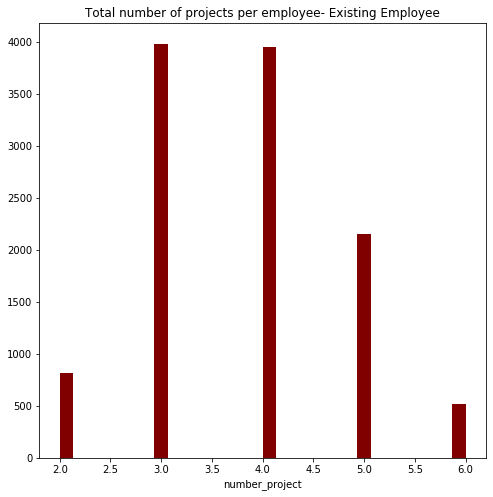

In [188]:
#Number of projects
plt.figure(figsize=(8,8))
plt.hist(existing_emp["number_project"],bins = 30,color="maroon")
plt.xlabel("number_project")
plt.title("Total number of projects per employee- Existing Employee")
plt.show()

Most of the current employees work either 3 0r 4 projects 

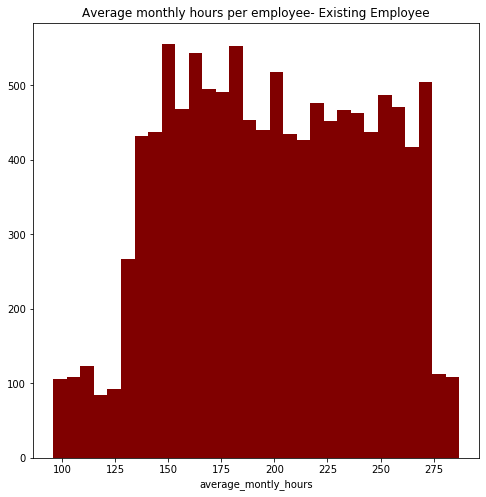

In [189]:
#Average hours
plt.figure(figsize=(8,8))
plt.hist(existing_emp["average_montly_hours"],bins = 30,color="maroon")
plt.xlabel("average_montly_hours")
plt.title("Average monthly hours per employee- Existing Employee")
plt.show()

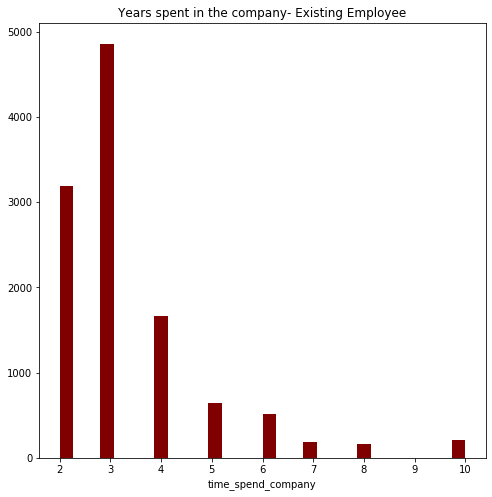

In [190]:
#Time spent in the company
plt.figure(figsize=(8,8))
plt.hist(existing_emp["time_spend_company"],bins = 30,color="maroon")
plt.xlabel("time_spend_company")
plt.title("Years spent in the company- Existing Employee")
plt.show()

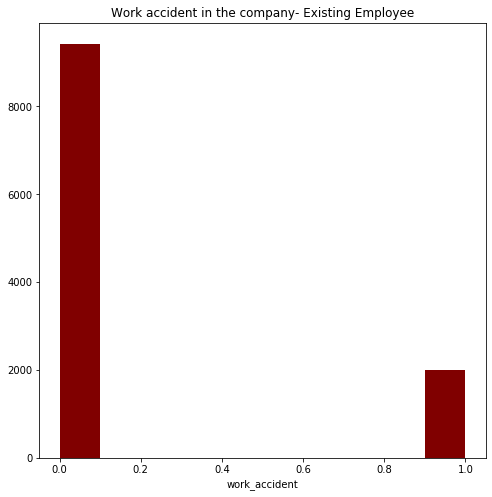

In [191]:
#Work Accident
plt.figure(figsize=(8,8))
plt.hist(existing_emp["work_accident"],color="maroon")
plt.xlabel("work_accident")
plt.title("Work accident in the company- Existing Employee")
plt.show()

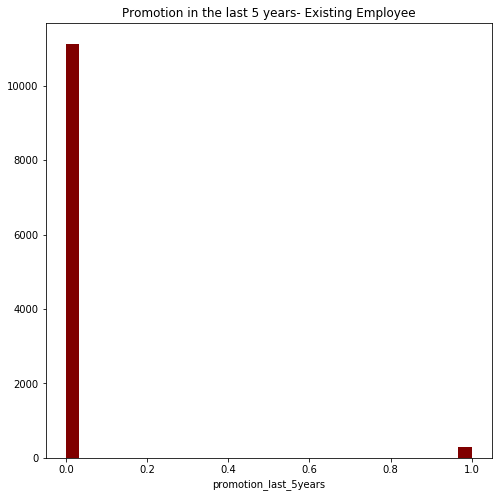

In [192]:
#promotion in the past 5 years
plt.figure(figsize=(8,8))
plt.hist(existing_emp["promotion_last_5years"],bins = 30,color="maroon")
plt.xlabel("promotion_last_5years")
plt.title("Promotion in the last 5 years- Existing Employee")
plt.show()

Most of the employees have not been given any promotions in the last 5 years 

### Bivariate Analysis

Since we have an understanding of all the variables, we shall compare different variables to check if they could cause attrition 

Department vs Satisfaction

Lets find out which department has more satisfied employees.

In [193]:
#checking the satisfaction levels of the employees 
existing_emp["satisfaction_level"].unique()

array([0.58, 0.82, 0.45, 0.78, 0.49, 0.36, 0.54, 0.99, 0.5 , 0.74, 0.56,
       0.34, 0.48, 0.73, 0.59, 0.81, 0.9 , 0.41, 0.89, 0.79, 0.98, 0.75,
       1.  , 0.24, 0.84, 0.92, 0.61, 0.85, 0.67, 0.76, 0.19, 0.51, 0.52,
       0.71, 0.33, 0.87, 0.68, 0.7 , 0.63, 0.72, 0.77, 0.86, 0.15, 0.93,
       0.62, 0.53, 0.97, 0.39, 0.69, 0.25, 0.12, 0.57, 0.6 , 0.2 , 0.94,
       0.17, 0.35, 0.42, 0.64, 0.91, 0.88, 0.96, 0.27, 0.65, 0.8 , 0.38,
       0.26, 0.55, 0.46, 0.13, 0.21, 0.22, 0.83, 0.18, 0.14, 0.16, 0.43,
       0.28, 0.95, 0.47, 0.32, 0.29, 0.4 , 0.66, 0.3 , 0.37, 0.44, 0.31,
       0.23])

#### Feature Engineering

In [194]:
# Feature Engineering
def satisfaction(df,variable_1):
  variable2_count = 0
  for ind ,row in df.iterrows():
    if row[variable_1] <= 0.25:
      df.loc[ind,'satisfaction'] = 0.25
    
    elif ((row[variable_1] > 0.25) & (row[variable_1] < 0.75)):
      df.loc[ind,'satisfaction'] = 0.50
    
    elif row[variable_1] >= 0.75:
        df.loc[ind,'satisfaction'] = 0.75
        
    else:
      df.loc[ind,'satisfaction'] = 0

In [195]:
#execute the function
satisfaction(existing_emp,"satisfaction_level")

In [196]:
#confirm the function has been implemented correctly
existing_emp.sample(10)

,emp_id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,dept,salary,satisfaction
8337,10338,0.90,0.66,3,256,4,0,0,hr,low,0.75
6764,8765,0.49,0.80,4,161,2,0,0,IT,medium,0.50
2802,4803,0.95,0.53,4,263,3,0,0,IT,low,0.75
2357,4358,0.58,0.93,5,235,2,0,0,management,low,0.50
5013,7014,0.63,0.67,5,250,2,0,0,product_mng,low,0.50
3201,5202,0.36,0.73,3,187,3,0,0,sales,medium,0.50
11341,14125,0.96,0.68,3,206,3,0,0,sales,medium,0.75
8301,10302,0.65,0.54,6,181,4,0,0,RandD,low,0.50
4845,6846,0.87,0.72,3,201,3,0,0,support,low,0.75
517,2518,0.55,0.63,5,184,4,0,0,marketing,medium,0.50


<Figure size 1080x1080 with 0 Axes>

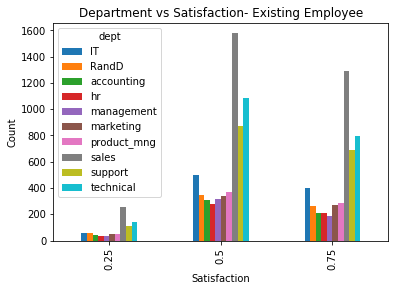

In [197]:
# Department vs Satisfaction
plt.figure(figsize=(15,15))
existing_emp.groupby('dept')["satisfaction"].value_counts().unstack(0).plot.bar()
plt.title("Department vs Satisfaction- Existing Employee")
plt.xlabel("Satisfaction")
plt.ylabel("Count")
plt.show()

Sales department has the highest number of satisfied employees followed by the technical department and Support department.

This could be attributed by the fact that they have the highest number of employees.

So we shall check how many employees are in each department to see if this could be the cause of the above result

In [198]:
#Which Department has more employees
plt.figure(figsize=(6,6))
existing_emp.groupby("dept")["emp_id"].count()

# Sales ,support , technical has the highest numbers of employees hance the high numbers on the satisfaction levels 
#ASSUMPTION - This 3 departments have the highest number of employees stilldue to some not experiencing growth maybe if tasks are unevenly distributed

dept
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: emp_id, dtype: int64

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

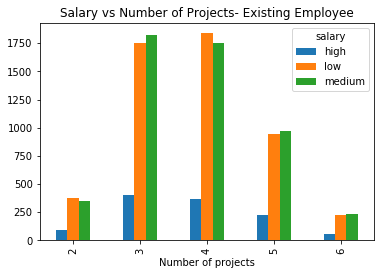

In [199]:
#Relationship between the number of projects and salary
plt.figure(figsize=(6,6))
existing_emp.groupby('salary')['number_project'].value_counts().unstack(0).plot.bar()
plt.title("Salary vs Number of Projects- Existing Employee")
plt.xlabel("Number of projects")
plt.show()
# There is presence of exploitation in the company since majority of the people with the many projects have very low salary
#We can conclude that, if presence of better opportunities arise, they are willing to take them

<Figure size 432x432 with 0 Axes>

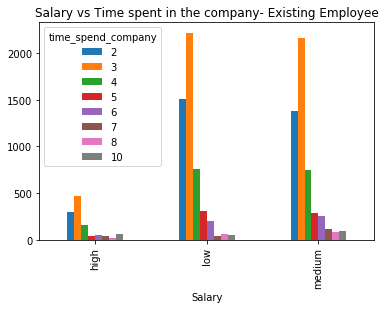

In [200]:
#Employee duration in the company vs the salary they earn
plt.figure(figsize=(6,6))
existing_emp.groupby('time_spend_company')['salary'].value_counts().unstack(0).plot.bar()
plt.title("Salary vs Time spent in the company- Existing Employee")
plt.xlabel("Salary")
plt.show()
#Based on the employees duration they have in the company,theyy are still being paid too little 

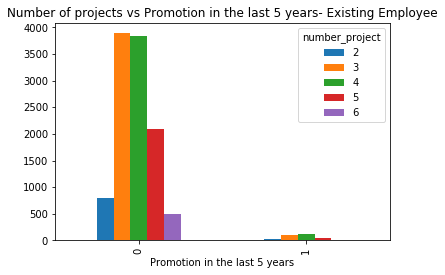

In [201]:
#Number of projects Vs Promotion in the last 5 years 
existing_emp.groupby(['number_project'])['promotion_last_5years'].value_counts().unstack(0).plot.bar()
plt.title("Number of projects vs Promotion in the last 5 years- Existing Employee")
plt.xlabel("Promotion in the last 5 years")
plt.show()
#Majority of the employees do not receive any promotion hence they might opt to leave and seek for career growth elsewhere 

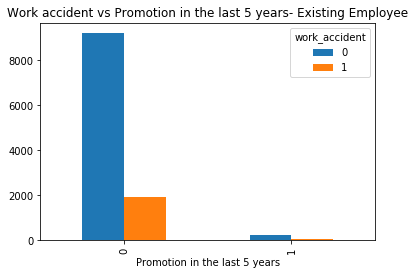

In [202]:
#Could the employees could cause them not to receive promotions
existing_emp.groupby(['work_accident'])['promotion_last_5years'].value_counts().unstack(0).plot.bar()
plt.title("Work accident vs Promotion in the last 5 years- Existing Employee")
plt.xlabel("Promotion in the last 5 years")
plt.show()
#from the graph, we can see that majority of the employees have been ethical (well behaved) yet they do not receive any promotions.

### Multivariate Analysis


,emp_id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,satisfaction
emp_id,1.000000,-0.008605,-0.018822,-0.004694,0.006287,0.250814,0.001522,0.115994,-0.001579
satisfaction_level,-0.008605,1.000000,0.086357,-0.092799,0.055354,-0.168791,-0.003128,0.001228,0.894235
last_evaluation,-0.018822,0.086357,1.000000,0.040306,0.090304,-0.017682,-0.007416,-0.002034,0.053577
number_project,-0.004694,-0.092799,0.040306,1.000000,0.070289,0.079943,0.001098,0.001676,-0.093752
average_montly_hours,0.006287,0.055354,0.090304,0.070289,1.000000,-0.016444,0.003285,0.007871,0.028841
time_spend_company,0.250814,-0.168791,-0.017682,0.079943,-0.016444,1.000000,0.027261,0.088629,-0.148592
work_accident,0.001522,-0.003128,-0.007416,0.001098,0.003285,0.027261,1.000000,0.028084,-0.006881
promotion_last_5years,0.115994,0.001228,-0.002034,0.001676,0.007871,0.088629,0.028084,1.000000,0.006849
satisfaction,-0.001579,0.894235,0.053577,-0.093752,0.028841,-0.148592,-0.006881,0.006849,1.000000


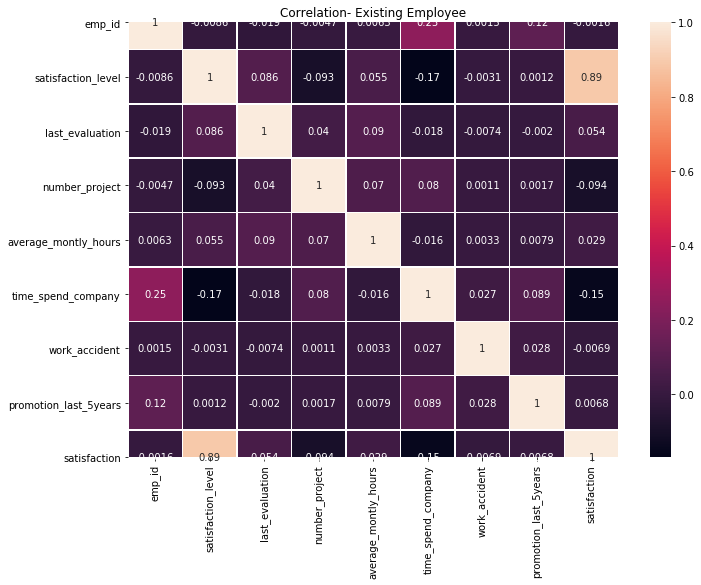

In [203]:
# Correlation 
corr = existing_emp.corr()
display(corr)
plt.figure(figsize=(11,8))
plt.title("Correlation- Existing Employee")
sns.heatmap(corr,annot = True,linewidths=.5)

The heatmap above shows that if there is a negative correlation one variable increases the other decreases

The number of projects and satisfaction levels have a negative correlation of -0.093. Meaning, when the number of projects increases, the employees satisfaction decreases.



# Assumptions

# Conclusion

## Findings

From the analysis conducted above, I have concluded that Company X is losing majority of there employees due to the wages . This could mean that the company has not reviewed their salary structure which should be reviewed every 18 - 24 months. The rationale behind this is to catch isssues before they become large enough to affect employee engagement and the organizations ability to attract and retain talent.

Moreover, addressing salary structure is less expensive compared to expenses endured for the recruiting process.
Company X could also lose its employees due to poor leadership which does not drive employees career development. In this case, we can see that majority of them have not received promotion for over 5 years and are still being under-paid.

If often seen that good employees get most of the work load due to the trust the leaders have in them. However, Company X should ensure than the number of projects are equally distributed among the employees. If not they should be awarded with incentives or increase in their salary 

The Company should aim in improving this attributes otherwise,they will keep losing their employees  

## Way forward

1) Company X needs to review the salary of there employees

2) They should add a culture to motivate employees by giving them incentives. Example, they could call out best performing employees for each department per quarter, they could give bonuses. 

3) Employ more workforce if the workload is too much for the available employees

4) Include activities like Team building. This builds trust among the employees and their superiors as well as amaong the employees themselves. It also creates an environment for everyone to solve internal conflicts they were facing.